In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from experiment_utils import *
from src import *
import numpy as np



pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [2]:
def plot_baf(preds, preds_base, X, y, title, sensitive_attrs):
    """
    plot scatter of preds vs preds_base.
    color points based on combinations of sensitive attributes in X, with names of the sens columns given in sensitive_attrs.
    """
    fig, ax = plt.subplots()
    
    # Create unique combinations of sensitive attributes
    unique_combinations = np.unique(X[sensitive_attrs].to_numpy(), axis=0)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_combinations*2)))
    color_dict = {tuple(combination): color for combination, color in zip(unique_combinations, colors)}
    
        
    # Create unique combinations of sensitive attributes
    unique_combinations = np.unique(X[sensitive_attrs].to_numpy(), axis=0)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_combinations)*2))    
    color_dict = {}
    for i, combo in enumerate(unique_combinations):
        color_dict[tuple(combo)] = colors[i*2:(i+1)*2]
    
    print(colors) 
    print(color_dict)
    
    # Add lines at x and y axes
    ax.axhline(0.5, color='black', linestyle='--', linewidth=1)
    ax.axvline(0.5, color='black', linestyle='--', linewidth=1)
    
    label_mask = (y == 1)
    # Scatter plot with color based on combinations of sensitive attributes
    for combination in unique_combinations:
        mask = np.all(X[sensitive_attrs].to_numpy() == combination, axis=1)
        ax.scatter(preds_base[mask & label_mask], preds[mask & label_mask], label=str(combination), color=color_dict[tuple(combination)][0], marker='s', alpha=0.5, s=20, edgecolor='none')
        ax.scatter(preds_base[mask & ~label_mask], preds[mask & ~label_mask], label=str(combination), color=color_dict[tuple(combination)][1], alpha=0.5, s=20, edgecolor='none')
    
    # Add labels and title
    ax.set_xlabel('Predictions Base Model')
    ax.set_ylabel('Predictions Model')
    ax.set_title(title)
    
    # Add legend
    ax.legend(title=sensitive_attrs)
    
    plt.show()


Adult Dataset ['race']
{'weight': 0.1, 'lr': 0.05, 'optimizer': 'Adam', 'layers': (30, 30), 'input_dim': None}
{'weight': 0.005}
----------------------------------------------------------------------------------------------------
FairMask Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


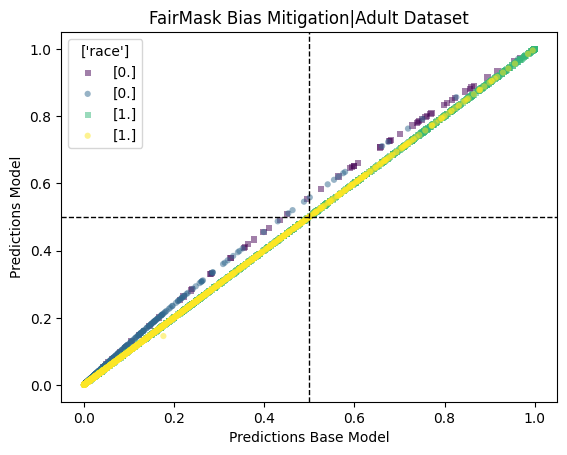

----------------------------------------------------------------------------------------------------
FairBalance Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


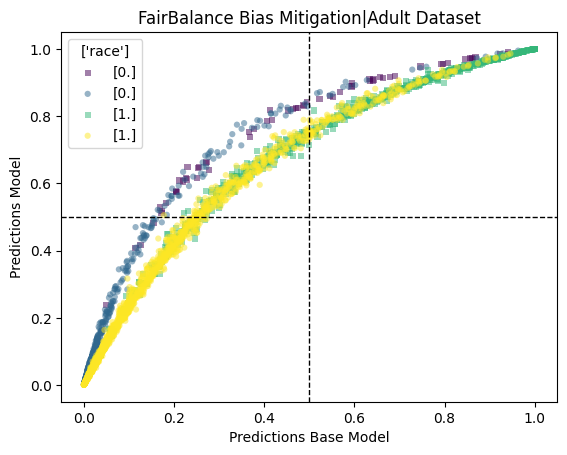

----------------------------------------------------------------------------------------------------
Reweighing Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


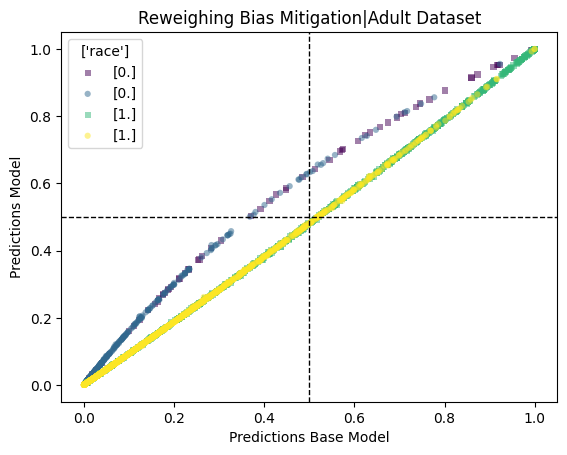

----------------------------------------------------------------------------------------------------
LFR
step: 0, loss: 0.7440363776028679, L_x: 0.8838586063417397,  L_y: 0.6441922237573128,  L_z: 0.005729146605690577
step: 250, loss: 0.7440363571835109, L_x: 0.8838586514760034,  L_y: 0.6441921996588245,  L_z: 0.005729146188543059
step: 500, loss: 0.6839270055483962, L_x: 0.8833757905500264,  L_y: 0.5844707469101712,  L_z: 0.0055593397916112244
step: 750, loss: 0.6385092410963518, L_x: 0.8794816828480632,  L_y: 0.5407429645064189,  L_z: 0.004909054152563259
step: 1000, loss: 0.6345568792995709, L_x: 0.8760507167855409,  L_y: 0.5378287149818486,  L_z: 0.004561546319584127
step: 1250, loss: 0.6185679339914428, L_x: 0.8522401768858343,  L_y: 0.5264154644872832,  L_z: 0.0034642259077881225
step: 1500, loss: 0.5925657719105164, L_x: 0.8102147493158978,  L_y: 0.5025820441721632,  L_z: 0.004481126403381731
step: 1750, loss: 0.5836179116614024, L_x: 0.7926689775754889,  L_y: 0.4936332216441962

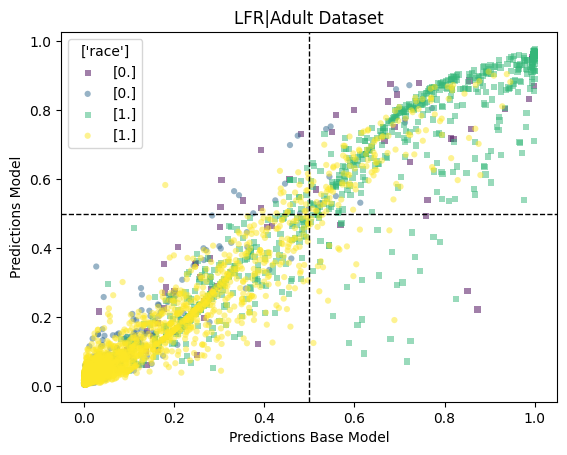

----------------------------------------------------------------------------------------------------
FYP VAE
input dim: 25
{(1.0,): 0.8552757302757302, (0.0,): 0.14472426972426972}
DISCR LAYERS [24, 30, 30]
------------------ <src.ml_models.FYP_VAE.losses.LatentDiscrLoss object at 0x000001B077273970> loss:   tensor(0.4912, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.PositiveVectorLoss object at 0x000001B077273910> loss:   tensor(4.2498e-05, grad_fn=<MeanBackward1>)
------------------ <src.ml_models.FYP_VAE.losses.ReconstructionLoss object at 0x000001B077273880> loss:   tensor(0.4631, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.KLDivergenceLoss object at 0x000001B077273940> loss:   tensor(0.0762, grad_fn=<MulBackward0>)
Epoch [1000/1200], Loss: 1.0304725
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.26

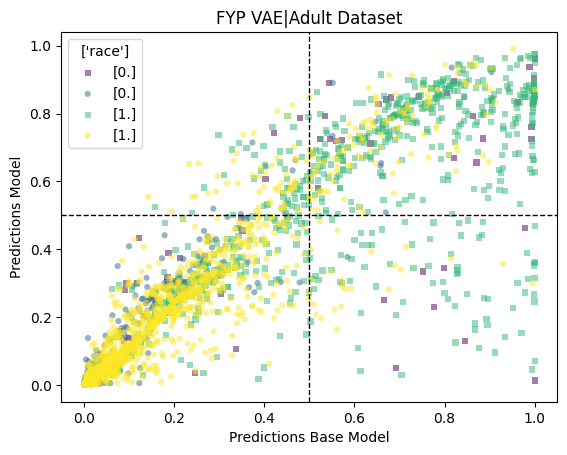

Adult Dataset ['sex']
{'weight': 0.1, 'lr': 0.05, 'optimizer': 'Adam', 'layers': (30, 30), 'input_dim': None}
{'weight': 0.005}
----------------------------------------------------------------------------------------------------
FairMask Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


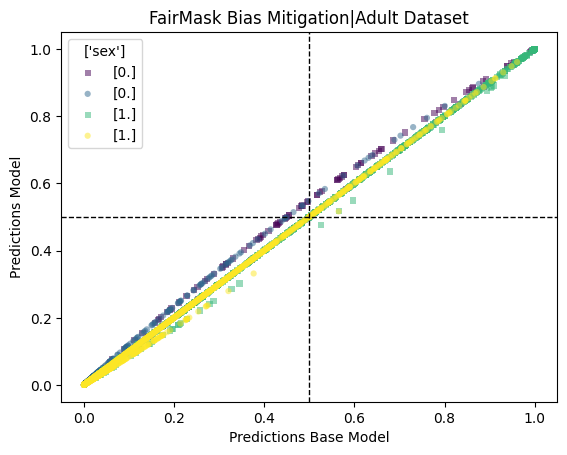

----------------------------------------------------------------------------------------------------
FairBalance Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


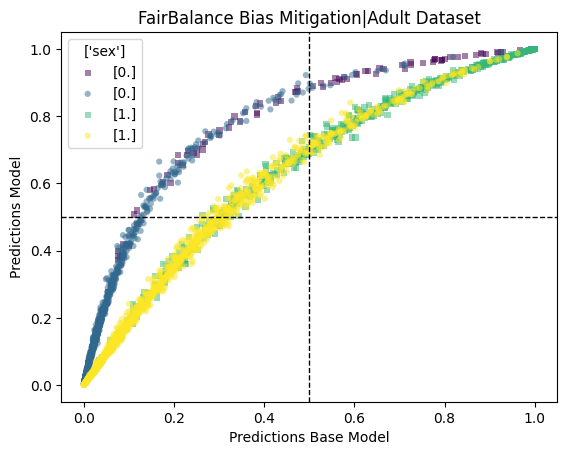

----------------------------------------------------------------------------------------------------
Reweighing Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


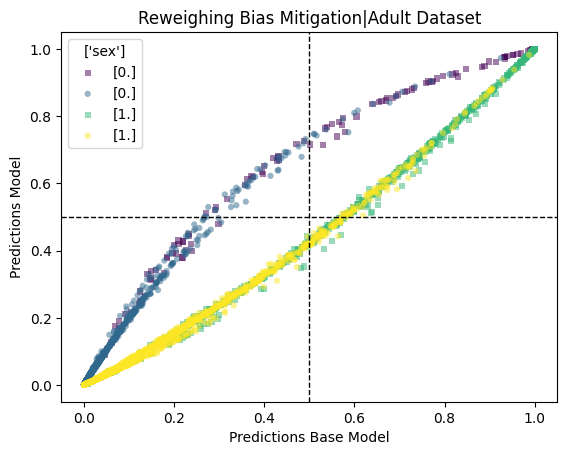

----------------------------------------------------------------------------------------------------
LFR
step: 0, loss: 0.7139269854761702, L_x: 0.9035946193488358,  L_y: 0.607585117813392,  L_z: 0.007991202863947326
step: 250, loss: 0.7139269985812292, L_x: 0.9035947175971799,  L_y: 0.6075851188843387,  L_z: 0.007991203968586201
step: 500, loss: 0.6718009073923865, L_x: 0.9018284245270015,  L_y: 0.5662262162963593,  L_z: 0.007695924321663565
step: 750, loss: 0.6428550379909809, L_x: 0.8947549058020756,  L_y: 0.5398097751929217,  L_z: 0.0067848861089257985
step: 1000, loss: 0.6394853835076992, L_x: 0.8915054522878395,  L_y: 0.5371136451538971,  L_z: 0.00661059656250908
step: 1250, loss: 0.627751515464305, L_x: 0.8780734291641175,  L_y: 0.5270349886259499,  L_z: 0.0064545919609716495
step: 1500, loss: 0.6111582046215324, L_x: 0.8524971102286679,  L_y: 0.5123379405227855,  L_z: 0.006785276537940026
step: 1750, loss: 0.5985729995141704, L_x: 0.8319809130604652,  L_y: 0.5010481622470246,  

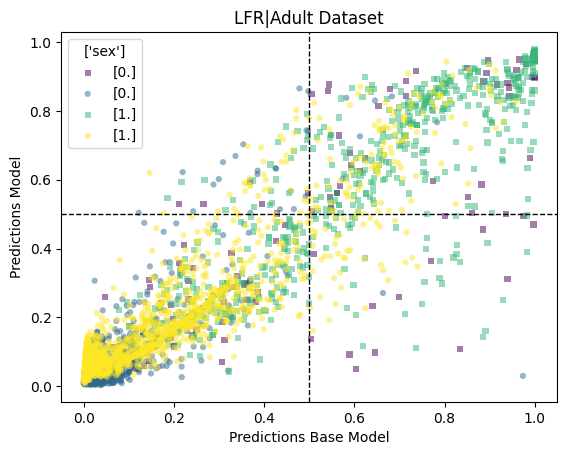

----------------------------------------------------------------------------------------------------
FYP VAE
input dim: 25
{(1.0,): 0.6688506688506689, (0.0,): 0.33114933114933115}
DISCR LAYERS [24, 30, 30]
------------------ <src.ml_models.FYP_VAE.losses.LatentDiscrLoss object at 0x000001B082AE8490> loss:   tensor(0.2480, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.PositiveVectorLoss object at 0x000001B082AE8760> loss:   tensor(0.0011, grad_fn=<MeanBackward1>)
------------------ <src.ml_models.FYP_VAE.losses.ReconstructionLoss object at 0x000001B082AE8160> loss:   tensor(0.4833, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.KLDivergenceLoss object at 0x000001B082AE8190> loss:   tensor(0.0769, grad_fn=<MulBackward0>)
Epoch [1000/1200], Loss: 0.8093970
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004

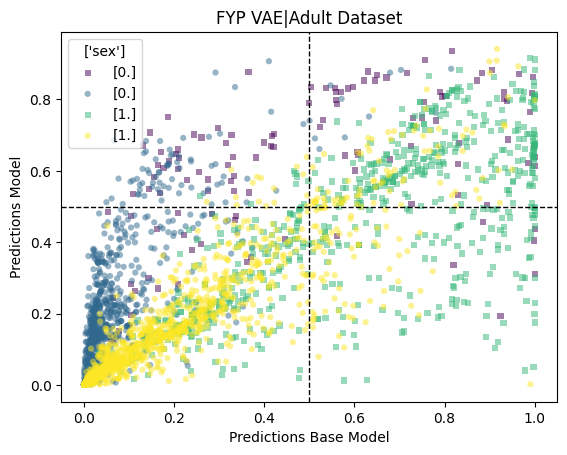

Adult Dataset ['sex', 'race']
{'weight': 0.1, 'lr': 0.05, 'optimizer': 'Adam', 'layers': (30, 30), 'input_dim': None}
{'weight': 0.005}
----------------------------------------------------------------------------------------------------
FairMask Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0, 0.0): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ]]), (0.0, 1.0): array([[0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ]]), (1.0, 0.0): array([[0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0.428426, 1.      ]]), (1.0, 1.0): array([[0.626579, 0.854645, 0.223353, 1.      ],
       [0.993248, 0.906157,

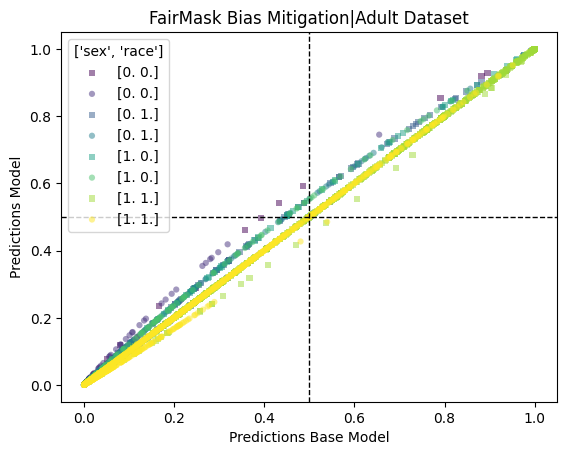

----------------------------------------------------------------------------------------------------
FairBalance Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0, 0.0): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ]]), (0.0, 1.0): array([[0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ]]), (1.0, 0.0): array([[0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0.428426, 1.      ]]), (1.0, 1.0): array([[0.626579, 0.854645, 0.223353, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


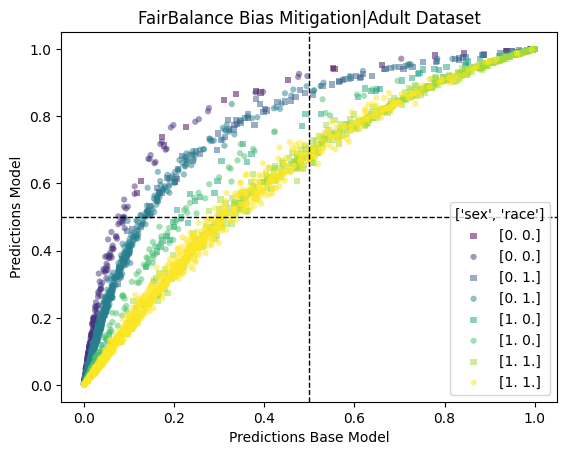

----------------------------------------------------------------------------------------------------
Reweighing Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0, 0.0): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ]]), (0.0, 1.0): array([[0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ]]), (1.0, 0.0): array([[0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0.428426, 1.      ]]), (1.0, 1.0): array([[0.626579, 0.854645, 0.223353, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


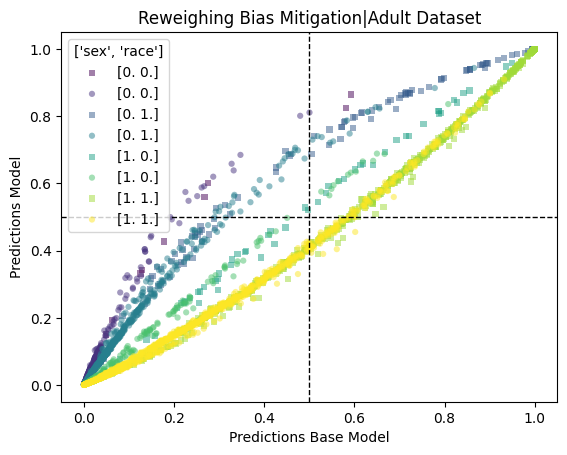

----------------------------------------------------------------------------------------------------
LFR
!!!!!!!!!!!!!!!!!!!! Multiple sensitive attributes not supported for LFR ['sex', 'race']
!!!!!!!!!!!!!!!!!!!! Multiple sensitive attributes not supported for LFR ['sex', 'race']
!!!!!!!!!!!!!!!!!!!! Multiple sensitive attributes not supported for LFR ['sex', 'race']
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0, 0.0): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ]]), (0.0, 1.0): array([[0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ]]), (1.0, 0.0): array([[0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0

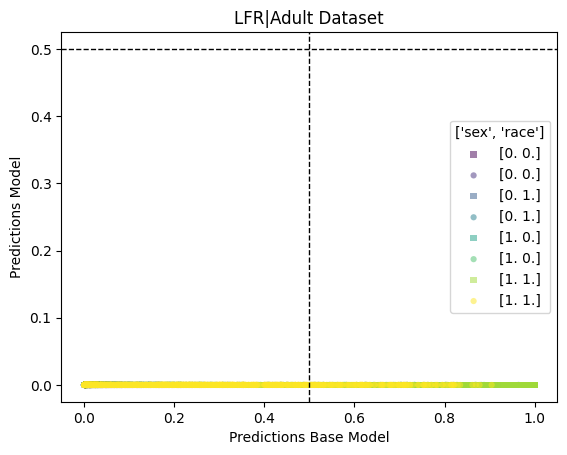

----------------------------------------------------------------------------------------------------
FYP VAE
input dim: 25
{(1.0, 1.0): 0.5884179634179634, (0.0, 1.0): 0.2654586404586405, (1.0, 0.0): 0.0807057057057057, (0.0, 0.0): 0.06541769041769042}
DISCR LAYERS [23, 30, 30]
DISCR LAYERS [23, 30, 30]
------------------ <src.ml_models.FYP_VAE.losses.LatentDiscrLoss object at 0x000001B082CE3B20> loss:   tensor(0.3686, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.PositiveVectorLoss object at 0x000001B082CE3D30> loss:   tensor(0.0009, grad_fn=<MeanBackward1>)
------------------ <src.ml_models.FYP_VAE.losses.ReconstructionLoss object at 0x000001B082CE3D90> loss:   tensor(0.5469, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.KLDivergenceLoss object at 0x000001B082CE3EB0> loss:   tensor(0.0724, grad_fn=<MulBackward0>)
Epoch [1000/1200], Loss: 0.9888384
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.21

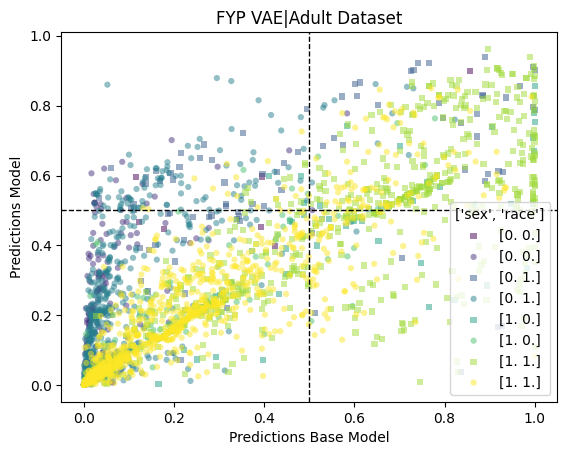

Compas Dataset ['race']
{'weight': 0.1, 'lr': 0.05, 'optimizer': 'Adam', 'layers': (30, 30), 'input_dim': None}
{'weight': 0.005}
----------------------------------------------------------------------------------------------------
FairMask Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


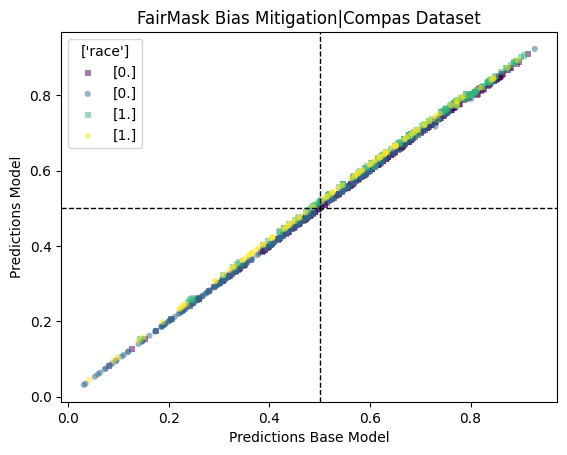

----------------------------------------------------------------------------------------------------
FairBalance Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


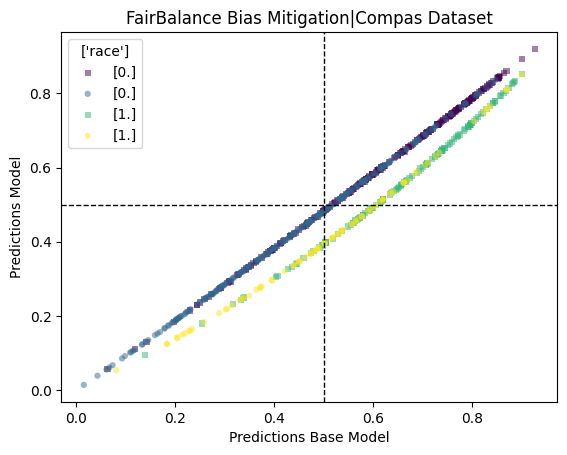

----------------------------------------------------------------------------------------------------
Reweighing Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


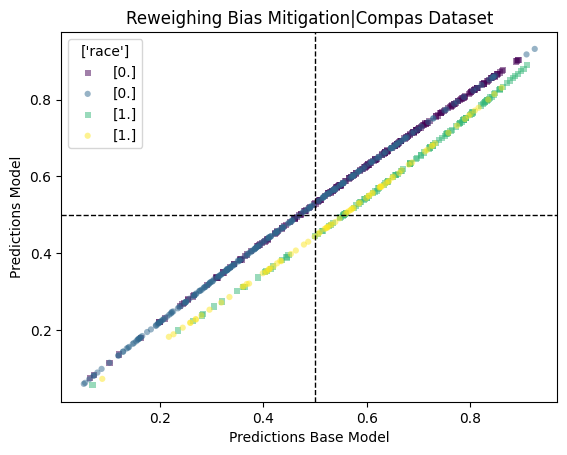

----------------------------------------------------------------------------------------------------
LFR
step: 0, loss: 0.8944061902723516, L_x: 1.8045221354618235,  L_y: 0.7010001648847506,  L_z: 0.006476905920709345
step: 250, loss: 0.85473219018553, L_x: 1.7798319737550699,  L_y: 0.666230102170455,  L_z: 0.005259445319784067
step: 500, loss: 0.8090745047760347, L_x: 1.578252918009572,  L_y: 0.6333005952099422,  L_z: 0.00897430888256769
step: 750, loss: 0.7558102872547967, L_x: 1.2449872874864043,  L_y: 0.6133775133826008,  L_z: 0.008967022561777725
step: 1000, loss: 0.7894461313315445, L_x: 1.0302693491578852,  L_y: 0.6334764891546768,  L_z: 0.02647135363053959
step: 1250, loss: 0.7320827616477708, L_x: 1.1207160034267203,  L_y: 0.608111978178701,  L_z: 0.005949591563198875
step: 1500, loss: 0.7295701513109122, L_x: 1.117909398912132,  L_y: 0.6080699473828901,  L_z: 0.004854632018404438
step: 1750, loss: 0.7243222652695055, L_x: 1.0953222476069966,  L_y: 0.6072377077724279,  L_z: 0.

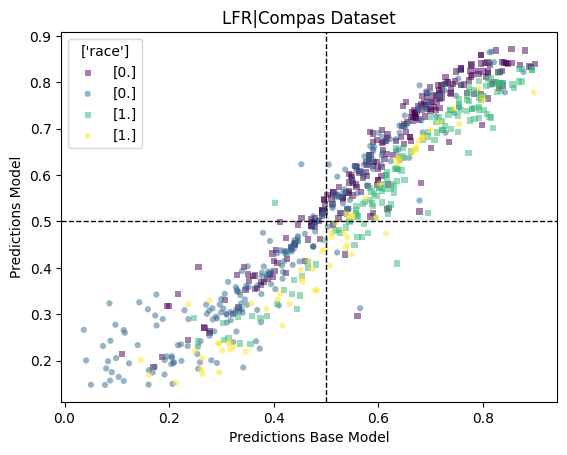

----------------------------------------------------------------------------------------------------
FYP VAE
input dim: 10
{(1.0,): 0.3400866068666873, (0.0,): 0.6599133931333128}
DISCR LAYERS [9, 30, 30]
------------------ <src.ml_models.FYP_VAE.losses.LatentDiscrLoss object at 0x000001B082BD3A90> loss:   tensor(0.2473, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.PositiveVectorLoss object at 0x000001B082BD31F0> loss:   tensor(0.0001, grad_fn=<MeanBackward1>)
------------------ <src.ml_models.FYP_VAE.losses.ReconstructionLoss object at 0x000001B082BD3040> loss:   tensor(0.7955, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.KLDivergenceLoss object at 0x000001B082BD3E80> loss:   tensor(0.0809, grad_fn=<MulBackward0>)
Epoch [1000/1200], Loss: 1.1239166
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 

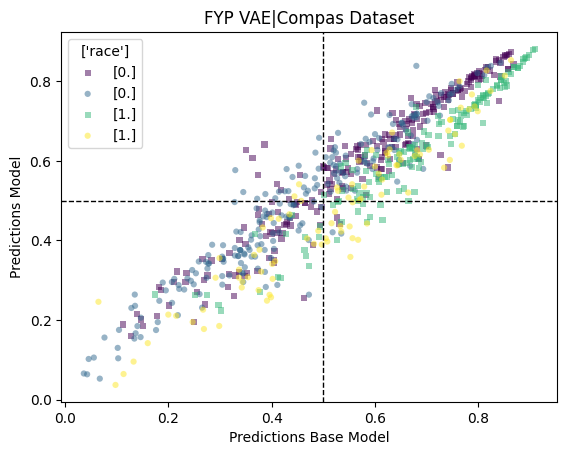

Compas Dataset ['sex']
{'weight': 0.1, 'lr': 0.05, 'optimizer': 'Adam', 'layers': (30, 30), 'input_dim': None}
{'weight': 0.005}
----------------------------------------------------------------------------------------------------
FairMask Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


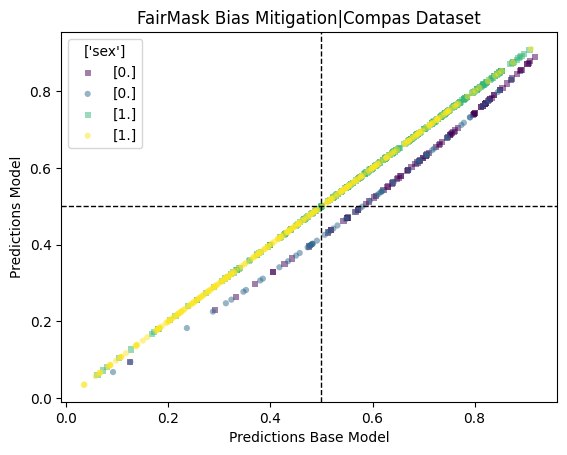

----------------------------------------------------------------------------------------------------
FairBalance Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


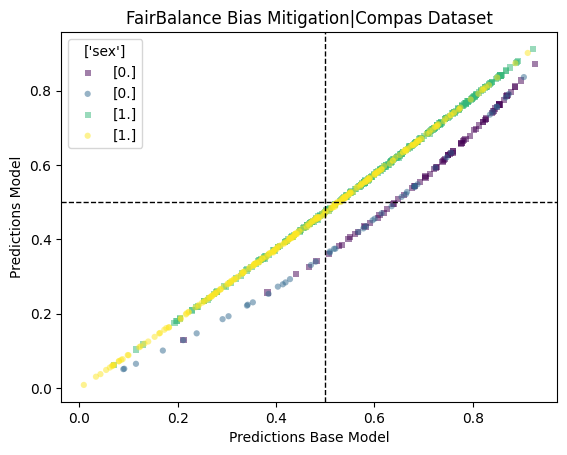

----------------------------------------------------------------------------------------------------
Reweighing Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


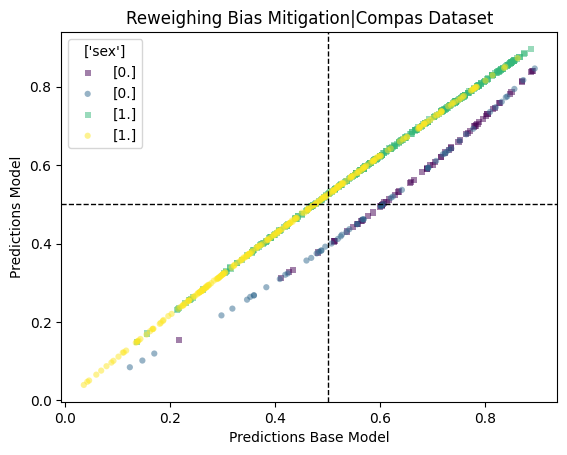

----------------------------------------------------------------------------------------------------
LFR
step: 0, loss: 0.9003394568336484, L_x: 1.5578905983016722,  L_y: 0.7321005760514733,  L_z: 0.006224910476003945
step: 250, loss: 0.8303289988384832, L_x: 1.5390947622801578,  L_y: 0.666087614568215,  L_z: 0.005165954021126268
step: 500, loss: 0.8012761504361822, L_x: 1.4524769191458238,  L_y: 0.6497553197084973,  L_z: 0.0031365694065511886
step: 750, loss: 0.7430413588893465, L_x: 1.150884672817244,  L_y: 0.6142302656762947,  L_z: 0.006861312965663724
step: 1000, loss: 0.7099255853282407, L_x: 0.8392795988441815,  L_y: 0.6115731427900664,  L_z: 0.007212241326878074
step: 1250, loss: 0.7027100468929072, L_x: 0.8058754735208963,  L_y: 0.6080436529650375,  L_z: 0.007039423287890034
step: 1500, loss: 0.6984988683900517, L_x: 0.7903548850788091,  L_y: 0.6073177318656093,  L_z: 0.006072824008280726
step: 1750, loss: 0.6943568535023059, L_x: 0.75786192754973,  L_y: 0.6075177472695409,  L_

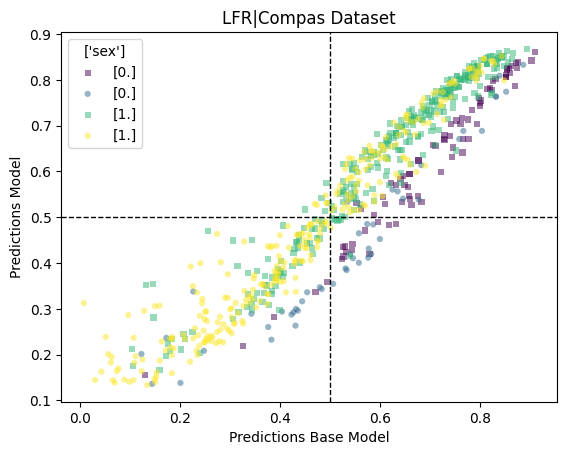

----------------------------------------------------------------------------------------------------
FYP VAE
input dim: 10
{(0.0,): 0.19749458707083203, (1.0,): 0.802505412929168}
DISCR LAYERS [9, 30, 30]
------------------ <src.ml_models.FYP_VAE.losses.LatentDiscrLoss object at 0x000001B081B458E0> loss:   tensor(0.4342, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.PositiveVectorLoss object at 0x000001B0872186A0> loss:   tensor(0.0002, grad_fn=<MeanBackward1>)
------------------ <src.ml_models.FYP_VAE.losses.ReconstructionLoss object at 0x000001B087218700> loss:   tensor(0.5875, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.KLDivergenceLoss object at 0x000001B0872187F0> loss:   tensor(0.0910, grad_fn=<MulBackward0>)
Epoch [1000/1200], Loss: 1.1129256
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 

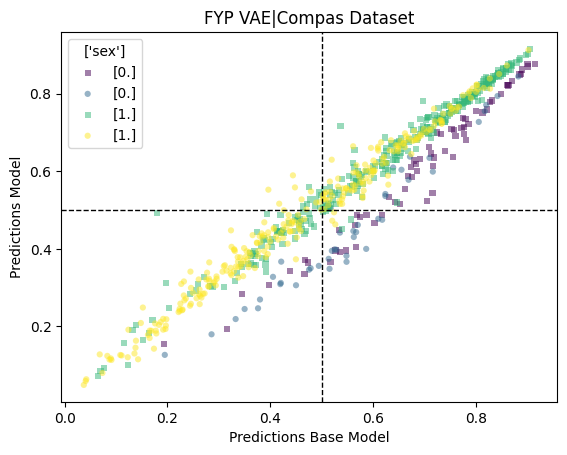

Compas Dataset ['sex', 'race']
{'weight': 0.1, 'lr': 0.05, 'optimizer': 'Adam', 'layers': (30, 30), 'input_dim': None}
{'weight': 0.005}
----------------------------------------------------------------------------------------------------
FairMask Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0, 0.0): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ]]), (0.0, 1.0): array([[0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ]]), (1.0, 0.0): array([[0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0.428426, 1.      ]]), (1.0, 1.0): array([[0.626579, 0.854645, 0.223353, 1.      ],
       [0.993248, 0.906157

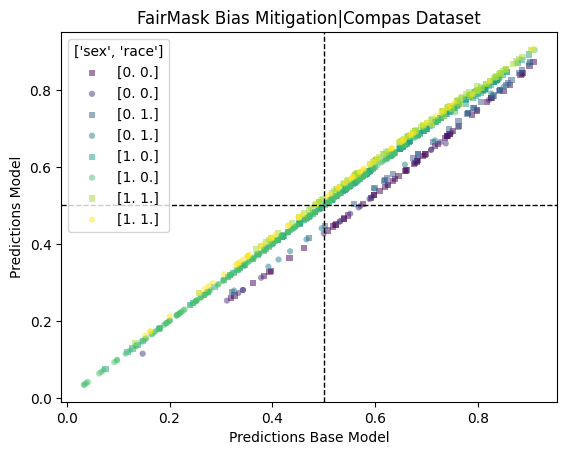

----------------------------------------------------------------------------------------------------
FairBalance Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0, 0.0): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ]]), (0.0, 1.0): array([[0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ]]), (1.0, 0.0): array([[0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0.428426, 1.      ]]), (1.0, 1.0): array([[0.626579, 0.854645, 0.223353, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


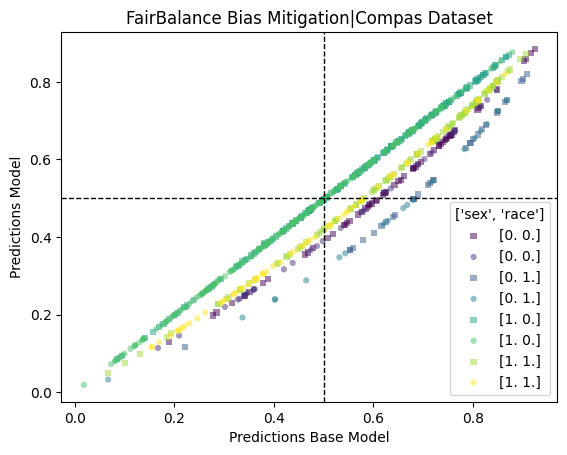

----------------------------------------------------------------------------------------------------
Reweighing Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0, 0.0): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ]]), (0.0, 1.0): array([[0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ]]), (1.0, 0.0): array([[0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0.428426, 1.      ]]), (1.0, 1.0): array([[0.626579, 0.854645, 0.223353, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


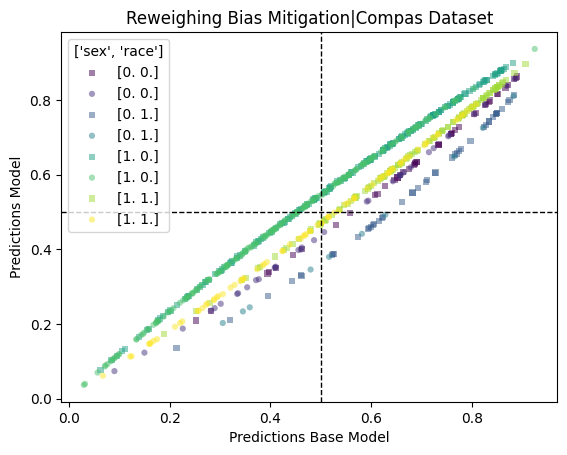

----------------------------------------------------------------------------------------------------
LFR
!!!!!!!!!!!!!!!!!!!! Multiple sensitive attributes not supported for LFR ['sex', 'race']
!!!!!!!!!!!!!!!!!!!! Multiple sensitive attributes not supported for LFR ['sex', 'race']
!!!!!!!!!!!!!!!!!!!! Multiple sensitive attributes not supported for LFR ['sex', 'race']
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0, 0.0): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ]]), (0.0, 1.0): array([[0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ]]), (1.0, 0.0): array([[0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0

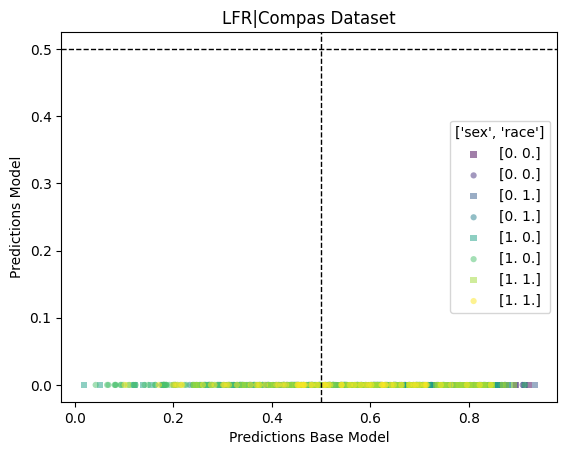

----------------------------------------------------------------------------------------------------
FYP VAE
input dim: 10
{(1.0, 1.0): 0.26384163315805753, (1.0, 0.0): 0.5446953294154037, (0.0, 0.0): 0.1153727188369935, (0.0, 1.0): 0.07609031858954532}
DISCR LAYERS [8, 30, 30]
DISCR LAYERS [8, 30, 30]
------------------ <src.ml_models.FYP_VAE.losses.LatentDiscrLoss object at 0x000001B07DFF2610> loss:   tensor(0.3531, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.PositiveVectorLoss object at 0x000001B0872EFA30> loss:   tensor(0.0002, grad_fn=<MeanBackward1>)
------------------ <src.ml_models.FYP_VAE.losses.ReconstructionLoss object at 0x000001B0872EF280> loss:   tensor(0.3607, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.KLDivergenceLoss object at 0x000001B0872EFA00> loss:   tensor(0.0844, grad_fn=<MulBackward0>)
Epoch [1000/1200], Loss: 0.7984205
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212

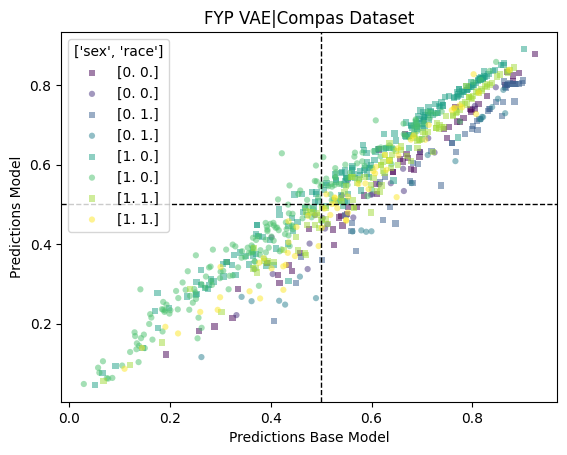

In [3]:

epochs = 1200
results_filename = "BAF"
other = {}

datasets = [Tester.ADULT_D, Tester.COMPAS_D]#, Tester.COMPAS_D] #[Tester.ADULT_D,  Tester.COMPAS_D]#, Tester.GERMAN_D, Tester.ADULT_D,], Tester.COMPAS_D, 
latent_dims = [25, 10]
metric_names = [Metrics.ACC]


losses = [
    [VAEMaskConfig.LATENT_S_ADV_LOSS, VAEMaskConfig.POS_VECTOR_LOSS,        VAEMaskConfig.RECON_LOSS, VAEMaskConfig.KL_DIV_LOSS],
]


comment= "FYP"

for dataset, dim in zip(datasets, latent_dims):
    for s in [["race"],["sex"], ["sex","race"]]: #  ["sex","race"],["race"],["sex"]
        print("="*100)
        print(dataset, s)
        eq_LG = [
            TestConfig(Tester.EQODDS, Model.LG_R, other={"c":"EqO2"}, sensitive_attr = s), 
            TestConfig(Tester.EQODDS_ALT, Model.LG_R, other={"c":"EqO ALT2"}, sensitive_attr = s), 
        ]
        vae_LG = [
            TestConfig(Tester.FYP_VAE, Model.LG_R, sensitive_attr=s, other={"c": comment, VAEMaskModel.VAE_MASK_CONFIG:  
                VAEMaskConfig(epochs=epochs, latent_dim=dim, lr=0.014, losses_used=l)}) for l in losses
            ]
        mls_LG = [  #eq_LG + 
            #TestConfig(Tester.BASE_ML, Model.LG_R , sensitive_attr = s),   
            TestConfig(Tester.FAIRMASK, Model.LG_R, Model.DT_R, sensitive_attr=s),
            TestConfig(Tester.FAIRBALANCE, Model.LG_R, sensitive_attr=s),
            TestConfig(Tester.REWEIGHING, Model.LG_R, sensitive_attr=s),
            TestConfig(Tester.LFR, Model.LG_R, other={"c":"LFR"}, sensitive_attr = s), #base_model_bias_mit=Tester.REWEIGHING
        ] +  vae_LG
        
        
        
        mls = mls_LG #+ mls_MLP
        base = TestConfig(Tester.BASE_ML, Model.LG_R , sensitive_attr = s)
        results_file = os.path.join("results",results_filename +"_".join(s)+".csv")
        #results_file = os.path.join("results",results_filename +".csv")
        tester = Tester(results_file, dataset, metric_names)
        for ml in mls:
            print("-"*100)
            print(ml.bias_mit)
            tester.run_tests([ml, base], 1, save_intermid_results=True)
            preds, X, y = tester.get_last_run()
            
            plot_baf(preds[0], preds[1], X, y, ml.bias_mit + '|' + dataset, s)
            
            

            
        

Adult Dataset ['race']
{'weight': 0.1, 'lr': 0.05, 'optimizer': 'Adam', 'layers': (30, 30), 'input_dim': None}
{'weight': 0.005}
----------------------------------------------------------------------------------------------------
FairMask Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


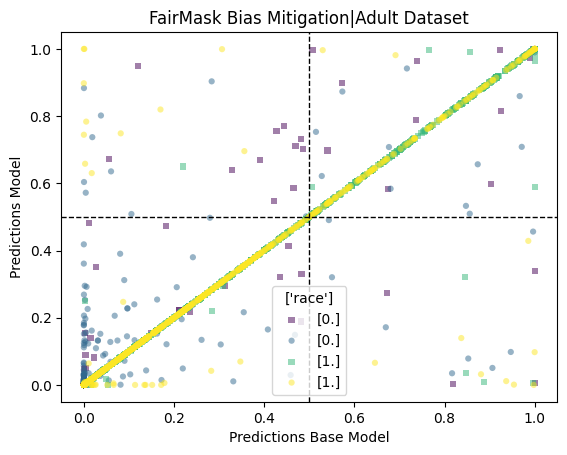

----------------------------------------------------------------------------------------------------
LFR
step: 0, loss: 0.7359584486000413, L_x: 0.8834487860624147,  L_y: 0.6335596927491325,  L_z: 0.007026938622333644
step: 250, loss: 0.7359584930404157, L_x: 0.8834488952366502,  L_y: 0.6335597248058628,  L_z: 0.007026939355443944
step: 500, loss: 0.6819120730163619, L_x: 0.8828666674133783,  L_y: 0.5799304262137611,  L_z: 0.006847490030631441
step: 750, loss: 0.6470406541093583, L_x: 0.8791022639063908,  L_y: 0.5470295235285856,  L_z: 0.0060504520950668455
step: 1000, loss: 0.6419583190475824, L_x: 0.8757668396594678,  L_y: 0.5428566984643106,  L_z: 0.00576246830866251
step: 1250, loss: 0.6162660716410893, L_x: 0.8539454190890501,  L_y: 0.5210353039874617,  L_z: 0.0049181128723612706
step: 1500, loss: 0.5610908181043491, L_x: 0.6622531179825897,  L_y: 0.456501509794767,  L_z: 0.01918199825566159
step: 1750, loss: 0.5342063931534958, L_x: 0.6399631656095793,  L_y: 0.4354381121049571,  

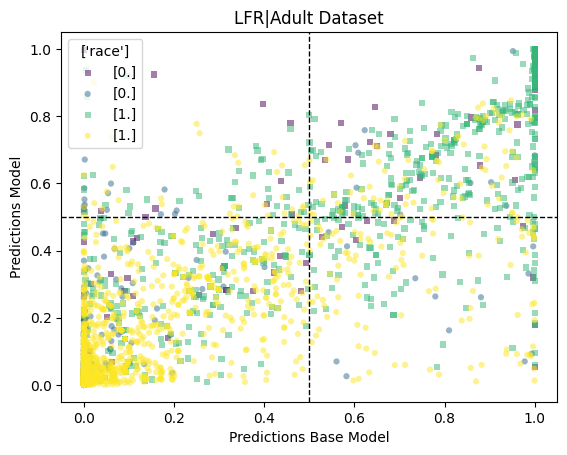

----------------------------------------------------------------------------------------------------
FYP VAE
input dim: 25
{(1.0,): 0.8532623532623532, (0.0,): 0.14673764673764675}
DISCR LAYERS [24, 30, 30]
------------------ <src.ml_models.FYP_VAE.losses.LatentDiscrLoss object at 0x000001B082BBF850> loss:   tensor(0.4815, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.PositiveVectorLoss object at 0x000001B07D383310> loss:   tensor(1.9968e-05, grad_fn=<MeanBackward1>)
------------------ <src.ml_models.FYP_VAE.losses.ReconstructionLoss object at 0x000001B07D3833A0> loss:   tensor(0.6208, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.KLDivergenceLoss object at 0x000001B08727EB80> loss:   tensor(0.0750, grad_fn=<MulBackward0>)
Epoch [1000/1600], Loss: 1.1773628
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.26

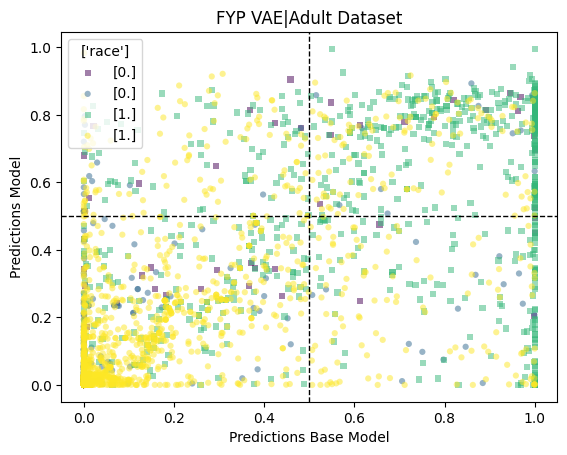

Adult Dataset ['sex']
{'weight': 0.1, 'lr': 0.05, 'optimizer': 'Adam', 'layers': (30, 30), 'input_dim': None}
{'weight': 0.005}
----------------------------------------------------------------------------------------------------
FairMask Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


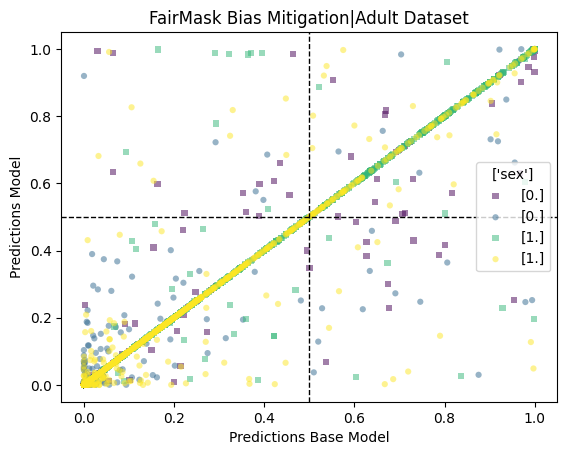

----------------------------------------------------------------------------------------------------
LFR
step: 0, loss: 0.7512091350243422, L_x: 0.8561806363344941,  L_y: 0.6495341772360858,  L_z: 0.008028447077403484
step: 250, loss: 0.7512091972094873, L_x: 0.8561808073971025,  L_y: 0.6495342261198533,  L_z: 0.008028445174961887
step: 500, loss: 0.6884395739152753, L_x: 0.8536915002290608,  L_y: 0.5874783641063156,  L_z: 0.007796029893026811
step: 750, loss: 0.6437399051596788, L_x: 0.8449573427312631,  L_y: 0.5447453092341416,  L_z: 0.0072494308262054784
step: 1000, loss: 0.6390804292527266, L_x: 0.8392476732111953,  L_y: 0.541713960237629,  L_z: 0.0067208508469890375
step: 1250, loss: 0.6305734481714963, L_x: 0.8258361170649087,  L_y: 0.5365693178250026,  L_z: 0.0057102593200014295
step: 1500, loss: 0.6040073761211576, L_x: 0.7709020707899025,  L_y: 0.5149587247102451,  L_z: 0.005979222165961128
step: 1750, loss: 0.5704625364606665, L_x: 0.6559054200082299,  L_y: 0.4736489874797816

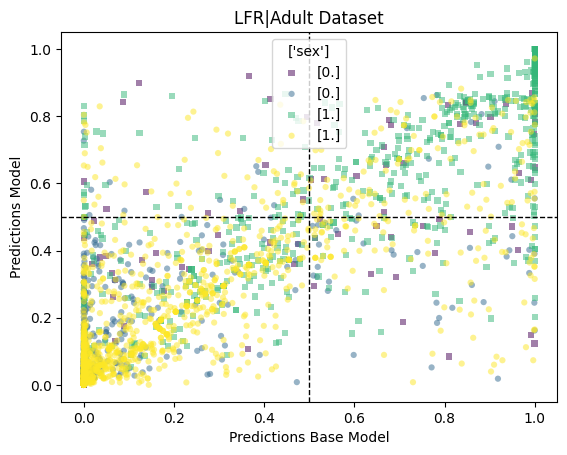

----------------------------------------------------------------------------------------------------
FYP VAE
input dim: 25
{(1.0,): 0.6702839202839203, (0.0,): 0.3297160797160797}
DISCR LAYERS [24, 30, 30]
------------------ <src.ml_models.FYP_VAE.losses.LatentDiscrLoss object at 0x000001B082BC6280> loss:   tensor(0.2530, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.PositiveVectorLoss object at 0x000001B082BC6DF0> loss:   tensor(0.0002, grad_fn=<MeanBackward1>)
------------------ <src.ml_models.FYP_VAE.losses.ReconstructionLoss object at 0x000001B082BC60D0> loss:   tensor(0.5117, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.KLDivergenceLoss object at 0x000001B082BC6B50> loss:   tensor(0.0713, grad_fn=<MulBackward0>)
Epoch [1000/1600], Loss: 0.8361719
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004,

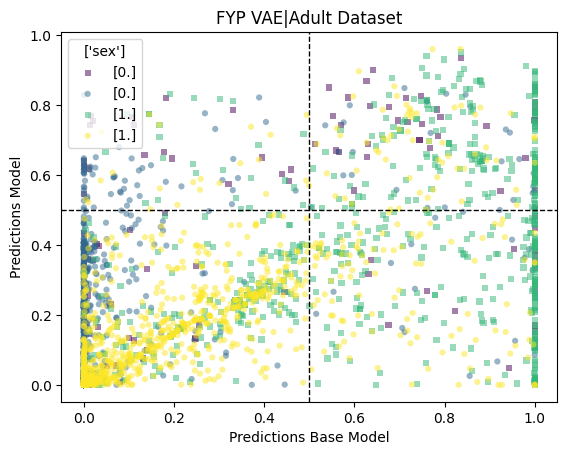

Adult Dataset ['sex', 'race']
{'weight': 0.1, 'lr': 0.05, 'optimizer': 'Adam', 'layers': (30, 30), 'input_dim': None}
{'weight': 0.005}
----------------------------------------------------------------------------------------------------
FairMask Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0, 0.0): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ]]), (0.0, 1.0): array([[0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ]]), (1.0, 0.0): array([[0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0.428426, 1.      ]]), (1.0, 1.0): array([[0.626579, 0.854645, 0.223353, 1.      ],
       [0.993248, 0.906157,

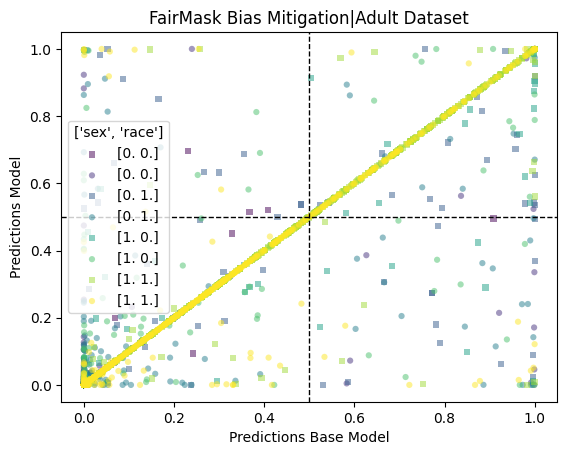

----------------------------------------------------------------------------------------------------
LFR
!!!!!!!!!!!!!!!!!!!! Multiple sensitive attributes not supported for LFR ['sex', 'race']
!!!!!!!!!!!!!!!!!!!! Multiple sensitive attributes not supported for LFR ['sex', 'race']
!!!!!!!!!!!!!!!!!!!! Multiple sensitive attributes not supported for LFR ['sex', 'race']
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0, 0.0): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ]]), (0.0, 1.0): array([[0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ]]), (1.0, 0.0): array([[0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0

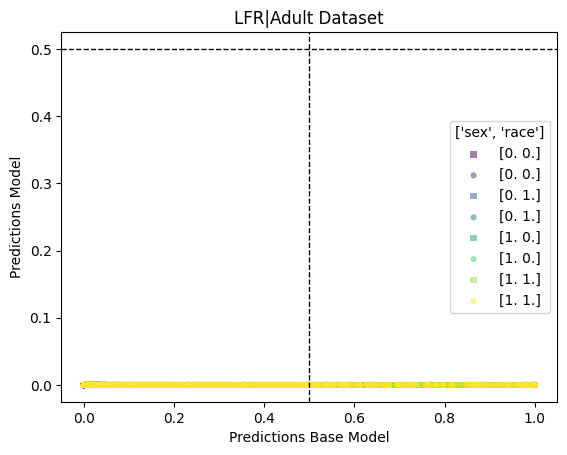

----------------------------------------------------------------------------------------------------
FYP VAE
input dim: 25
{(1.0, 0.0): 0.08084220584220585, (1.0, 1.0): 0.589987714987715, (0.0, 1.0): 0.2648785148785149, (0.0, 0.0): 0.0642915642915643}
DISCR LAYERS [23, 30, 30]
DISCR LAYERS [23, 30, 30]
------------------ <src.ml_models.FYP_VAE.losses.LatentDiscrLoss object at 0x000001B082B50100> loss:   tensor(0.3766, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.PositiveVectorLoss object at 0x000001B087264B50> loss:   tensor(0.0004, grad_fn=<MeanBackward1>)
------------------ <src.ml_models.FYP_VAE.losses.ReconstructionLoss object at 0x000001B0872642E0> loss:   tensor(0.5096, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.KLDivergenceLoss object at 0x000001B087264C10> loss:   tensor(0.0749, grad_fn=<MulBackward0>)
Epoch [1000/1600], Loss: 0.9616024
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212

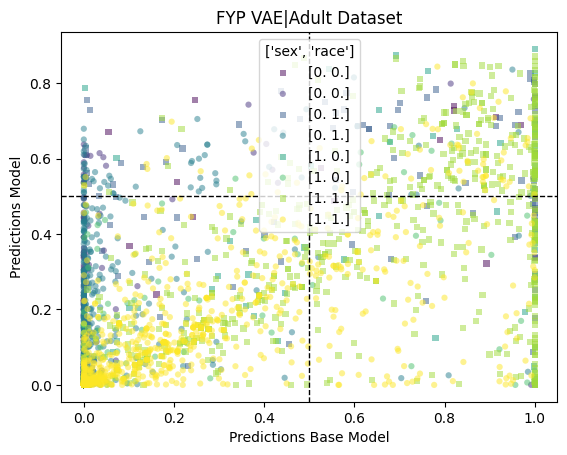

Compas Dataset ['race']
{'weight': 0.1, 'lr': 0.05, 'optimizer': 'Adam', 'layers': (30, 30), 'input_dim': None}
{'weight': 0.005}
----------------------------------------------------------------------------------------------------
FairMask Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


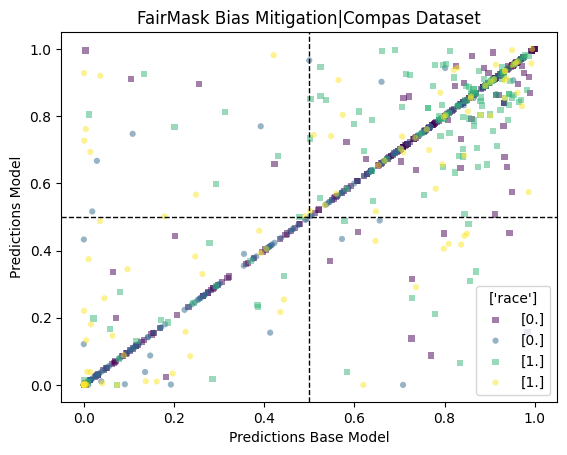

----------------------------------------------------------------------------------------------------
LFR
step: 0, loss: 0.9109898247416941, L_x: 1.6715880176995541,  L_y: 0.7256103181807496,  L_z: 0.009110352395494509
step: 250, loss: 0.8720610854830324, L_x: 1.660852563219992,  L_y: 0.6910875380460495,  L_z: 0.0074441455574918245
step: 500, loss: 0.8425753421137188, L_x: 1.572287223325279,  L_y: 0.6693240311626858,  L_z: 0.008011294309252539
step: 750, loss: 0.7884544632209811, L_x: 1.3220991616957685,  L_y: 0.6259793015130187,  L_z: 0.015132622769192727
step: 1000, loss: 0.7369857328320517, L_x: 1.0808050227923132,  L_y: 0.6019767649790981,  L_z: 0.013464232786861157
step: 1250, loss: 0.7318803528233493, L_x: 0.9999158322190688,  L_y: 0.6024499271119326,  L_z: 0.014719421244754874
step: 1500, loss: 0.7208308613533766, L_x: 0.9745667490585908,  L_y: 0.6023693095340653,  L_z: 0.010502438456726087
step: 1750, loss: 0.7152055407319957, L_x: 0.9399260158651226,  L_y: 0.60267750479228,  L_

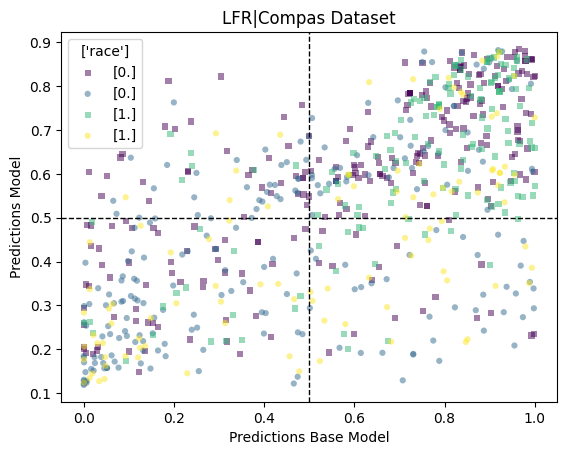

----------------------------------------------------------------------------------------------------
FYP VAE
input dim: 10
{(0.0,): 0.6558923600371173, (1.0,): 0.3441076399628828}
DISCR LAYERS [9, 30, 30]
------------------ <src.ml_models.FYP_VAE.losses.LatentDiscrLoss object at 0x000001B082CCB670> loss:   tensor(0.2473, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.PositiveVectorLoss object at 0x000001B0775ABA30> loss:   tensor(0.0006, grad_fn=<MeanBackward1>)
------------------ <src.ml_models.FYP_VAE.losses.ReconstructionLoss object at 0x000001B0775AB790> loss:   tensor(0.6447, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.KLDivergenceLoss object at 0x000001B082D12D60> loss:   tensor(0.0866, grad_fn=<MulBackward0>)
Epoch [1000/1600], Loss: 0.9791881
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 

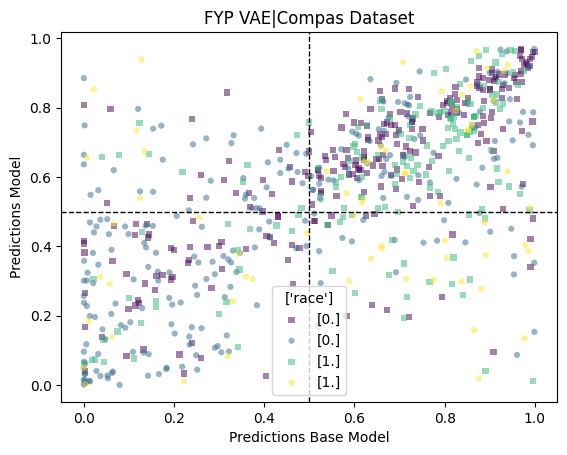

Compas Dataset ['sex']
{'weight': 0.1, 'lr': 0.05, 'optimizer': 'Adam', 'layers': (30, 30), 'input_dim': None}
{'weight': 0.005}
----------------------------------------------------------------------------------------------------
FairMask Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ]]), (1.0,): array([[0.20803 , 0.718701, 0.472873, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])}


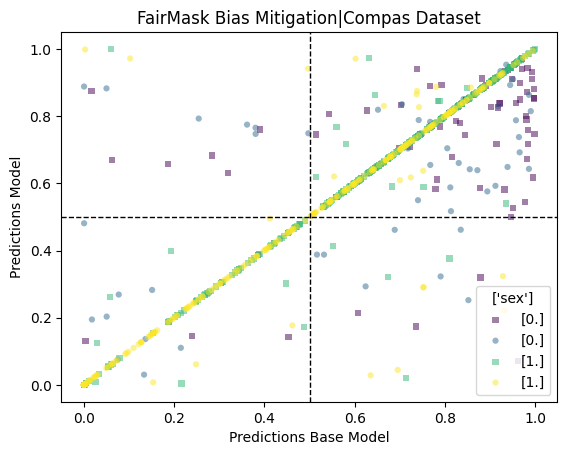

----------------------------------------------------------------------------------------------------
LFR
step: 0, loss: 0.8689843661392325, L_x: 1.7176499566790624,  L_y: 0.6788920322585901,  L_z: 0.009163669106368063
step: 250, loss: 0.8355168684796028, L_x: 1.6305435521315528,  L_y: 0.6571314469758552,  L_z: 0.007665533145296159
step: 500, loss: 0.7781870244955186, L_x: 1.3051840903914835,  L_y: 0.6292248653503034,  L_z: 0.009221875053033382
step: 750, loss: 0.7388729805069473, L_x: 1.0004900993387773,  L_y: 0.6167840455980234,  L_z: 0.01101996248752307
step: 1000, loss: 0.7107089416973955, L_x: 0.92004075801327,  L_y: 0.6060106743376937,  L_z: 0.00634709577918741
step: 1250, loss: 0.7071757455282375, L_x: 0.9165217046912608,  L_y: 0.6056288860486247,  L_z: 0.004947344505243287
step: 1500, loss: 0.7065460104782788, L_x: 0.9152835354502296,  L_y: 0.605634533675943,  L_z: 0.004691561628656441
step: 1750, loss: 0.7045493484787654, L_x: 0.9082026143376686,  L_y: 0.6063331931972036,  L_z:

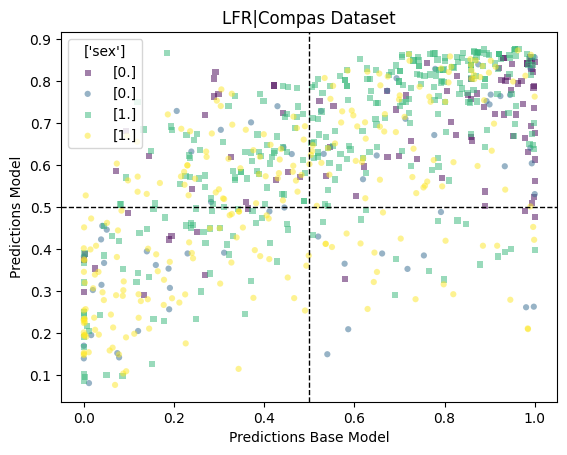

----------------------------------------------------------------------------------------------------
FYP VAE
input dim: 10
{(1.0,): 0.8069904113826167, (0.0,): 0.19300958861738324}
DISCR LAYERS [9, 30, 30]
------------------ <src.ml_models.FYP_VAE.losses.LatentDiscrLoss object at 0x000001B082B5D460> loss:   tensor(0.4439, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.PositiveVectorLoss object at 0x000001B082B5D4C0> loss:   tensor(0.0002, grad_fn=<MeanBackward1>)
------------------ <src.ml_models.FYP_VAE.losses.ReconstructionLoss object at 0x000001B082B5D310> loss:   tensor(1.0966, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.KLDivergenceLoss object at 0x000001B082B5DA60> loss:   tensor(0.0684, grad_fn=<MulBackward0>)
Epoch [1000/1600], Loss: 1.6090349
[[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0,): array([[0.267004,

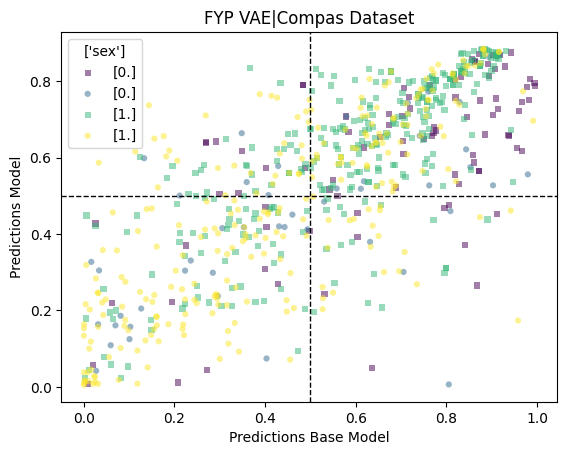

Compas Dataset ['sex', 'race']
{'weight': 0.1, 'lr': 0.05, 'optimizer': 'Adam', 'layers': (30, 30), 'input_dim': None}
{'weight': 0.005}
----------------------------------------------------------------------------------------------------
FairMask Bias Mitigation
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0, 0.0): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ]]), (0.0, 1.0): array([[0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ]]), (1.0, 0.0): array([[0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0.428426, 1.      ]]), (1.0, 1.0): array([[0.626579, 0.854645, 0.223353, 1.      ],
       [0.993248, 0.906157

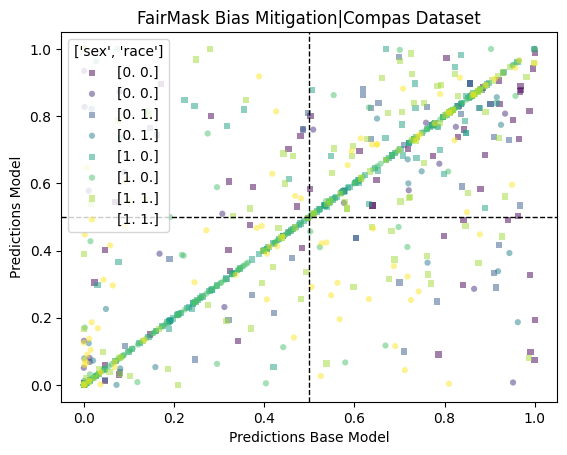

----------------------------------------------------------------------------------------------------
LFR
!!!!!!!!!!!!!!!!!!!! Multiple sensitive attributes not supported for LFR ['sex', 'race']
!!!!!!!!!!!!!!!!!!!! Multiple sensitive attributes not supported for LFR ['sex', 'race']
!!!!!!!!!!!!!!!!!!!! Multiple sensitive attributes not supported for LFR ['sex', 'race']
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
{(0.0, 0.0): array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ]]), (0.0, 1.0): array([[0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ]]), (1.0, 0.0): array([[0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0

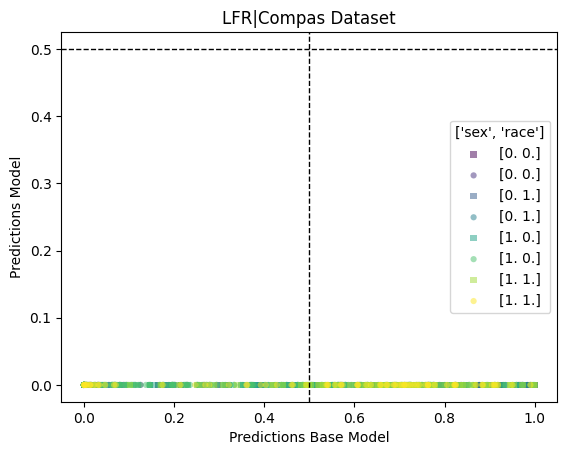

----------------------------------------------------------------------------------------------------
FYP VAE
input dim: 10
{(1.0, 0.0): 0.5468605010825859, (0.0, 1.0): 0.0771729044231364, (1.0, 1.0): 0.261212496133622, (0.0, 0.0): 0.11475409836065574}
DISCR LAYERS [8, 30, 30]
DISCR LAYERS [8, 30, 30]
------------------ <src.ml_models.FYP_VAE.losses.LatentDiscrLoss object at 0x000001B082D5A400> loss:   tensor(0.3497, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.PositiveVectorLoss object at 0x000001B082D5A8B0> loss:   tensor(0.0002, grad_fn=<MeanBackward1>)
------------------ <src.ml_models.FYP_VAE.losses.ReconstructionLoss object at 0x000001B082D5A220> loss:   tensor(0.5776, grad_fn=<MulBackward0>)
------------------ <src.ml_models.FYP_VAE.losses.KLDivergenceLoss object at 0x000001B082D5A0A0> loss:   tensor(0.0767, grad_fn=<MulBackward0>)
Epoch [1000/1600], Loss: 1.0041492
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.21239

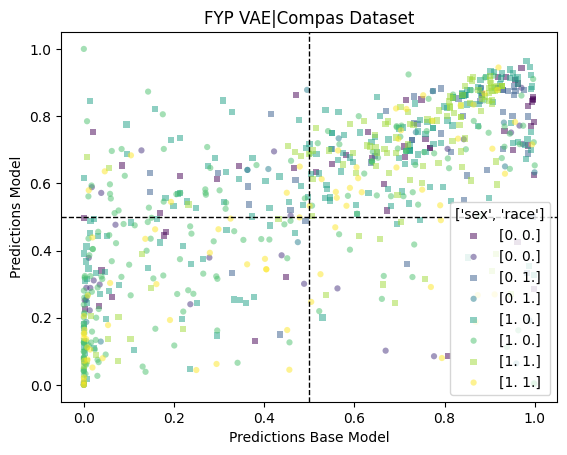

In [4]:

epochs = 1600
results_filename = "BAF"
other = {}

datasets = [Tester.ADULT_D, Tester.COMPAS_D]#, Tester.COMPAS_D] #[Tester.ADULT_D,  Tester.COMPAS_D]#, Tester.GERMAN_D, Tester.ADULT_D,], Tester.COMPAS_D, 
latent_dims = [25, 10]
metric_names = [Metrics.ACC]


losses = [
    [VAEMaskConfig.LATENT_S_ADV_LOSS, VAEMaskConfig.POS_VECTOR_LOSS,        VAEMaskConfig.RECON_LOSS, VAEMaskConfig.KL_DIV_LOSS],
]


comment= "FYP"

for dataset, dim in zip(datasets, latent_dims):
    for s in [["race"],["sex"], ["sex","race"]]: #  ["sex","race"],["race"],["sex"]
        print("="*100)
        print(dataset, s)
        
        
        eq_MLP = [
            TestConfig(Tester.EQODDS, Model.MLP_C, other={"c":"EqO2"}, sensitive_attr = s), 
            TestConfig(Tester.EQODDS_ALT, Model.MLP_C, other={"c":"EqO ALT2"}, sensitive_attr = s), 
        ]
        vae_MLP = [
            TestConfig(Tester.FYP_VAE, Model.MLP_C, sensitive_attr=s, other={"c": comment, VAEMaskModel.VAE_MASK_CONFIG:  
                VAEMaskConfig(epochs=epochs, latent_dim=dim, lr=0.014, losses_used=l)}) for l in losses
            ]
        mls_MLP =  [
           # TestConfig(Tester.BASE_ML, Model.MLP_C , sensitive_attr = s),   
            TestConfig(Tester.FAIRMASK, Model.MLP_C, Model.DT_R, sensitive_attr=s),
            TestConfig(Tester.LFR, Model.MLP_C, other={"c":"LFR"}, sensitive_attr = s), #base_model_bias_mit=Tester.REWEIGHING
            
        ] +  vae_MLP 
        
        mls = mls_MLP
        base = TestConfig(Tester.BASE_ML, Model.MLP_C , sensitive_attr = s)
        results_file = os.path.join("results",results_filename +"_".join(s)+".csv")
        #results_file = os.path.join("results",results_filename +".csv")
        tester = Tester(results_file, dataset, metric_names)
        for ml in mls:
            print("-"*100)
            print(ml.bias_mit)
            tester.run_tests([ml, base], 1, save_intermid_results=True)
            preds, X, y = tester.get_last_run()
            
            plot_baf(preds[0], preds[1], X, y, ml.bias_mit + '|' + dataset, s)
            
            

            
        